# Analisis Data : Used Cars Dataset 

**Nama : Rihan Naufaldihanif**

**Deployment : https://used-car-analysis.streamlit.app/** 

**Pertanyaan Bisnis**

1. Apa merek mobil bekas yang paling banyak dicari di pasar India?
2. Bagaimana hubungan antara usia mobil, kilometer, dan brand mobil dengan harga jualnya?
3. Apa pola pembelian berdasarkan kepemilikan (first owner vs second owner)?

## Import Package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Data Wrangling
**Load Dataset**

Dataset ini berisi informasi mobil bekas di pasar India yang terdiri dari 9.582 entri dengan 11 atribut detail. Data tersebut tampaknya dikumpulkan hingga November 2024, memberikan gambaran komprehensif tentang pasar mobil bekas di India.

In [2]:
df = pd.read_csv("used_car_dataset.csv")
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


## Data Assessing / Data availability Checking 

**Check Null and Duplicated Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [4]:
print(df.isnull().sum())
df.duplicated().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64


np.int64(724)

**Clean null and duplicated data**

In [5]:
df = df.dropna() 
df.duplicated().sum()

np.int64(723)

**Normalized km driven and price data into number format**

In [6]:
df['kmDriven'] = df['kmDriven'].str.replace(',','').str.replace('km','').str.strip().apply(lambda x: int(float(x)))
df['AskPrice'] = df['AskPrice'].str.replace(',','').str.replace('₹','').str.strip().apply(lambda x: int(x))

## Descriptive Statistics

In [7]:
# Summary statistics
print(df.describe())


              Year          Age       kmDriven      AskPrice
count  9535.000000  9535.000000    9535.000000  9.535000e+03
mean   2016.375669     7.624331   70605.891453  1.067161e+06
std       4.071090     4.071090   56308.596299  1.661675e+06
min    1986.000000     0.000000       0.000000  1.500000e+04
25%    2014.000000     5.000000   43000.000000  3.650000e+05
50%    2017.000000     7.000000   65000.000000  5.999990e+05
75%    2019.000000    10.000000   86000.000000  1.140000e+06
max    2024.000000    38.000000  980002.000000  4.250000e+07


In [8]:
# Group by Brand for specific insights
print(df.groupby('Brand')['AskPrice'].mean())

Brand
Ambassador       5.772995e+05
Ashok            3.200000e+04
Aston Martin     2.640000e+07
Audi             1.684356e+06
BMW              2.851446e+06
Bajaj            2.845000e+05
Bentley          1.850000e+07
Chevrolet        2.538202e+05
Datsun           2.540908e+05
Fiat             2.583136e+05
Force            1.136833e+06
Ford             1.086433e+06
Honda            5.217741e+05
Hyundai          6.004997e+05
Isuzu            1.547900e+06
Jaguar           2.402676e+06
Jeep             1.726680e+06
Kia              1.388541e+06
Land Rover       5.533901e+06
Lexus            7.413750e+06
MG               1.611739e+06
Mahindra         9.589113e+05
Maruti Suzuki    4.885649e+05
Maserati         8.000000e+06
Mercedes-Benz    3.574790e+06
Mini             2.815463e+06
Mitsubishi       8.006777e+05
Nissan           4.572533e+05
Opel             1.290000e+05
Porsche          7.900792e+06
Renault          4.328681e+05
Rolls-Royce      2.136750e+07
Skoda            9.242307e+05
Ssan

## Descriptive Statistics Data Mobil Bekas 

| Kolom       | Jumlah Data (count) | Rata-rata (mean) | Standar Deviasi (std) | Minimum (min) | Kuartil 25% (25%) | Median (50%) | Kuartil 75% (75%) | Maksimum (max) |
|-------------|----------------------|------------------|------------------------|----------------|-------------------|---------------|-------------------|----------------|
| Year        | 9535                | 2016.38          | 4.07                   | 1986           | 2014              | 2017          | 2019              | 2024           |
| Age         | 9535                | 7.62             | 4.07                   | 0              | 5                 | 7             | 10                | 38             |
| kmDriven    | 9535                | 70605.89         | 56308.60               | 0              | 43000             | 65000         | 86000             | 980002         |
| AskPrice    | 9535                | 1,067,161        | 1,661,675              | 15,000         | 365,000           | 599,999       | 1,140,000         | 42,500,000     |

**Penjelasan:**
1. **Year (Tahun Produksi):**
   - Tahun produksi mobil berkisar antara **1986** hingga **2024**.
   - Rata-rata tahun produksi adalah **2016**, menunjukkan bahwa sebagian besar mobil cukup baru.
   
2. **Age (Usia Mobil):**
   - Usia mobil rata-rata adalah **7,62 tahun**, dengan usia maksimum **38 tahun**.
   - Sebagian besar mobil berusia antara **5 hingga 10 tahun**.

3. **kmDriven (Kilometer Tempuh):**
   - Rata-rata kilometer tempuh adalah **70.605 km**.
   - Sebagian besar mobil menempuh jarak **43.000 hingga 86.000 km**.

4. **AskPrice (Harga Jual):**
   - Rata-rata harga jual adalah **1.067.161 Rupee**, dengan rentang harga mulai dari **15.000 Rupee** hingga **42.500.000 Rupee**.
   - Sebagian besar harga jual berada pada rentang **365.000 hingga 1.140.000 Rupee**.

---

## Rata-rata Harga Berdasarkan Merek
Berikut adalah rata-rata harga jual mobil berdasarkan merek:

| Merek            | Rata-rata Harga (Rupee) |
|-------------------|-------------------------|
| Ambassador        | 577,299                |
| Ashok             | 32,000                 |
| Aston Martin      | 26,400,000             |
| Audi              | 1,684,356              |
| BMW               | 2,851,446              |
| Bajaj             | 284,500                |
| Bentley           | 18,500,000             |
| Chevrolet         | 253,820                |
| Datsun            | 254,091                |
| Fiat              | 258,314                |
| Force             | 1,136,833              |
| Ford              | 1,086,433              |
| Honda             | 521,774                |
| Hyundai           | 600,499                |
| Isuzu             | 1,547,900              |
| Jaguar            | 2,402,676              |
| Jeep              | 1,726,680              |
| Kia               | 1,388,541              |
| Land Rover        | 5,533,901              |
| Lexus             | 7,413,750              |
| MG                | 1,611,739              |
| Mahindra          | 958,911                |
| Maruti Suzuki     | 488,565                |
| Maserati          | 8,000,000              |
| Mercedes-Benz     | 3,574,790              |
| Mini              | 2,815,463              |
| Mitsubishi        | 800,678                |
| Nissan            | 457,253                |
| Opel              | 129,000                |
| Porsche           | 7,900,792              |
| Renault           | 432,868                |
| Rolls-Royce       | 21,367,500             |
| Skoda             | 924,231                |
| Ssangyong         | 407,500                |
| Tata              | 677,536                |
| Toyota            | 1,778,049              |
| Volkswagen        | 709,315                |
| Volvo             | 2,612,884              |

**Penjelasan:**
- **Merek Mewah:** Merek seperti Aston Martin, Bentley, dan Rolls-Royce memiliki rata-rata harga sangat tinggi, dengan Rolls-Royce mencapai **21 juta Rupee**.
- **Merek Ekonomis:** Merek seperti Ashok dan Chevrolet memiliki rata-rata harga lebih rendah, berkisar antara **32.000 hingga 250.000 Rupee**.
- **Merek Populer:** Merek seperti Maruti Suzuki, Honda, dan Hyundai memiliki harga rata-rata berkisar antara **480.000 hingga 600.000 Rupee**, menunjukkan bahwa mereka populer di segmen menengah.

---

Dengan data ini, dapat disimpulkan bahwa pasar mobil bekas di India memiliki berbagai segmen, mulai dari mobil ekonomis hingga mobil mewah dengan harga sangat tinggi.

## Exploratory Data Analysis

In [9]:
brand_counts = df['Brand'].value_counts()

top_brands = brand_counts.head(10)
print(top_brands)

Brand
Maruti Suzuki    2699
Hyundai          1523
Honda             799
Toyota            773
Mahindra          557
Mercedes-Benz     402
Tata              384
BMW               342
Volkswagen        317
Audi              264
Name: count, dtype: int64


In [10]:
print(df[['Age', 'kmDriven', 'AskPrice']].corr())

               Age  kmDriven  AskPrice
Age       1.000000  0.278672 -0.304350
kmDriven  0.278672  1.000000 -0.142683
AskPrice -0.304350 -0.142683  1.000000


In [11]:
brand_price_avg = df.groupby('Brand')['AskPrice'].mean().sort_values(ascending=False)
print(brand_price_avg.head(10))


Brand
Aston Martin     2.640000e+07
Rolls-Royce      2.136750e+07
Bentley          1.850000e+07
Maserati         8.000000e+06
Porsche          7.900792e+06
Lexus            7.413750e+06
Land Rover       5.533901e+06
Mercedes-Benz    3.574790e+06
BMW              2.851446e+06
Mini             2.815463e+06
Name: AskPrice, dtype: float64


In [12]:
owner_counts = df['Owner'].value_counts()
print(owner_counts)

owner_price_avg = df.groupby('Owner')['AskPrice'].mean()
print(owner_price_avg)

Owner
first     4783
second    4752
Name: count, dtype: int64
Owner
first     1.263220e+06
second    8.698236e+05
Name: AskPrice, dtype: float64


## Data Visualization

C:\Users\rihan\AppData\Local\Temp\ipykernel_15664\3053005383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


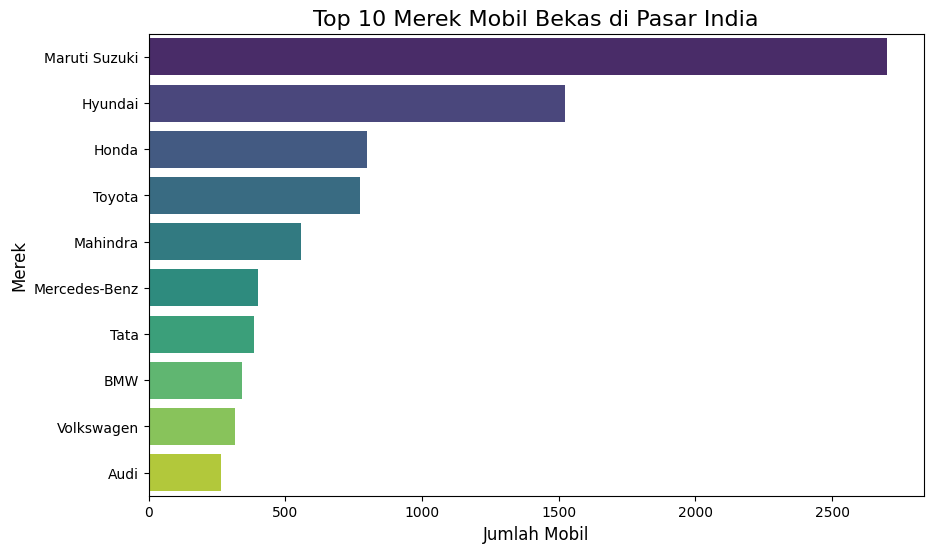

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 Merek Mobil Bekas di Pasar India', fontsize=16)
plt.xlabel('Jumlah Mobil', fontsize=12)
plt.ylabel('Merek', fontsize=12)
plt.show()

Bar chart **diatas** menunjukkan bahwa Maruti Suzuki adalah merek yang paling populer, diikuti oleh Hyundai dan Honda.

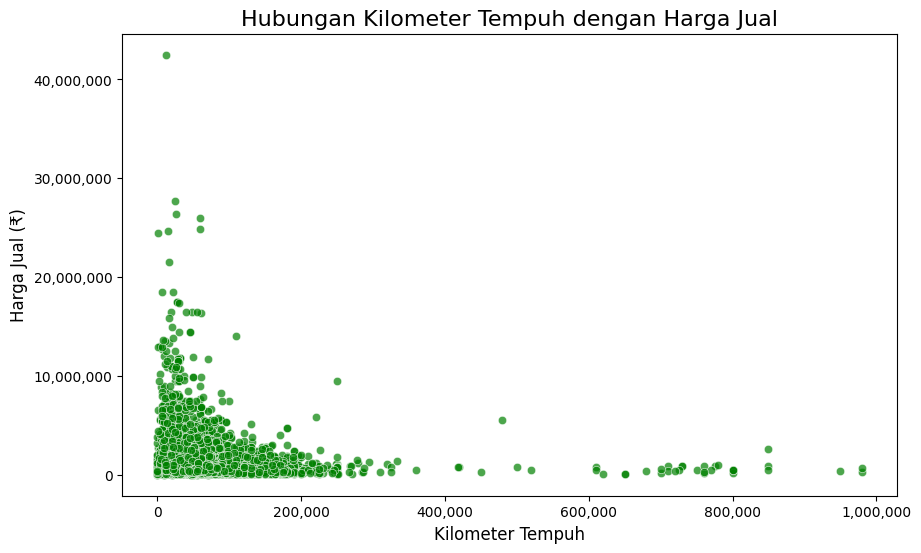

In [14]:
def format_number(x, _):
    return f'{int(x):,}'  

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kmDriven', y='AskPrice', alpha=0.7, color='green')
plt.title('Hubungan Kilometer Tempuh dengan Harga Jual', fontsize=16)
plt.xlabel('Kilometer Tempuh', fontsize=12)
plt.ylabel('Harga Jual (₹)', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))  # Format sumbu x
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))  # Format sumbu y
plt.show()

Mobil dengan kilometer tempuh lebih rendah cenderung memiliki harga jual yang lebih tinggi

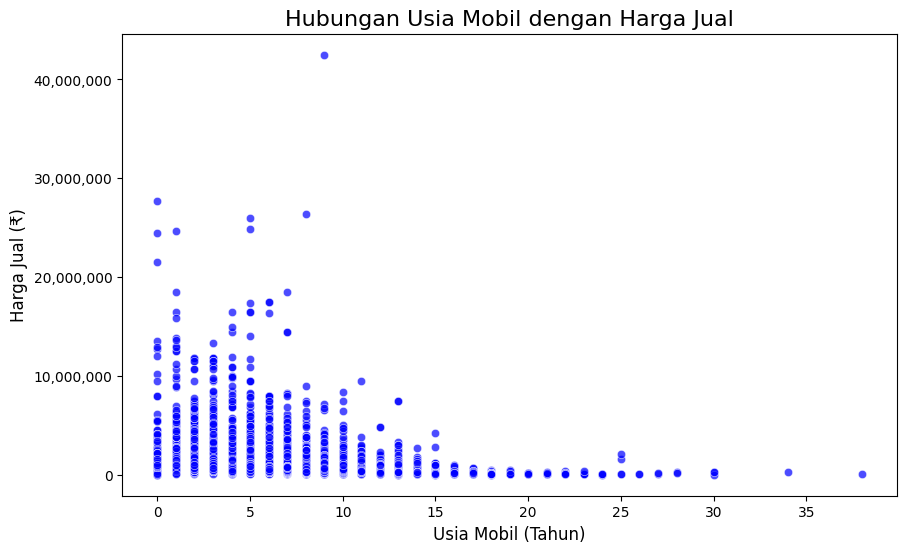

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='AskPrice', alpha=0.7, color='blue')
plt.title('Hubungan Usia Mobil dengan Harga Jual', fontsize=16)
plt.xlabel('Usia Mobil (Tahun)', fontsize=12)
plt.ylabel('Harga Jual (₹)', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))  # Format sumbu x
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))  # Format sumbu y
plt.show()

Mobil yang lebih baru cenderung memiliki harga jual lebih tinggi dibandingkan dengan mobil yang lebih tua. Semakin tua usia mobil, harga jual cenderung turun secara signifikan.

C:\Users\rihan\AppData\Local\Temp\ipykernel_15664\3371762262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price_avg_sorted.values, y=brand_price_avg_sorted.index, palette='magma')


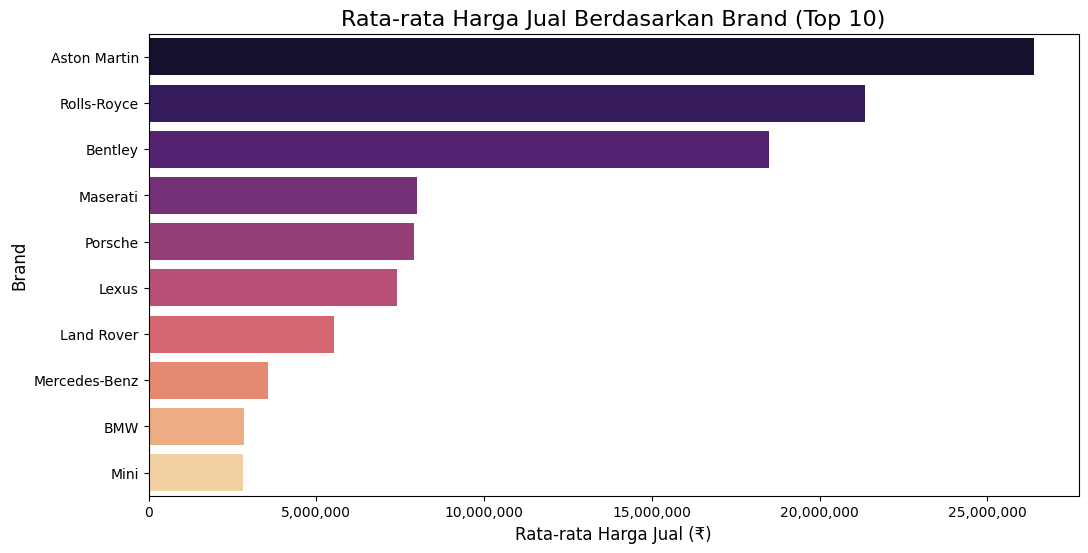

In [16]:
brand_price_avg_sorted = brand_price_avg.sort_values(ascending=False).head(10)  # Top 10 brand dengan harga rata-rata tertinggi

plt.figure(figsize=(12, 6))
sns.barplot(x=brand_price_avg_sorted.values, y=brand_price_avg_sorted.index, palette='magma')
plt.title('Rata-rata Harga Jual Berdasarkan Brand (Top 10)', fontsize=16)
plt.xlabel('Rata-rata Harga Jual (₹)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_number))  # Format sumbu x dengan angka aktual
plt.show()

Barchart diatas menunjukan bahwa 3 brand dengan harga teratas, yaitu Aston Martin, Rolls-Royce, dan Betley memiliki gap yang cukup jauh terhadap brand lain seperti maserati, porsche,lexus, land rover, marcedes,bmw, dan mini.

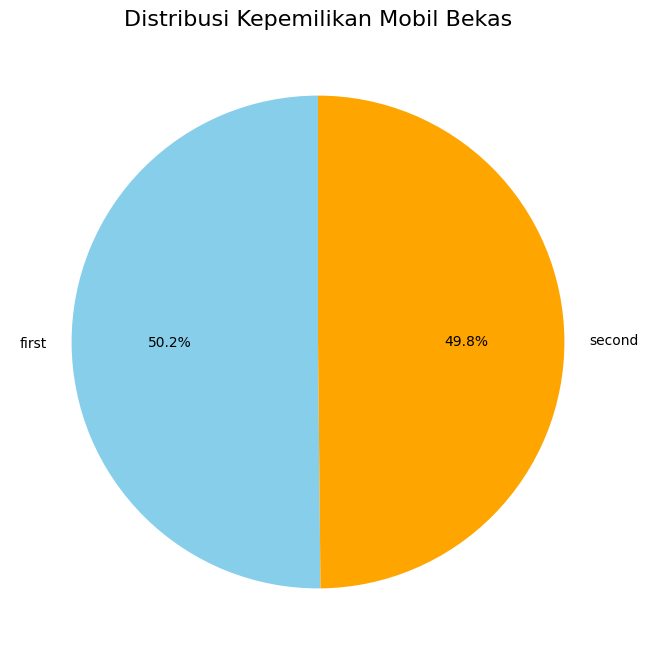

In [17]:
owner_labels = owner_counts.index
owner_sizes = owner_counts.values

plt.figure(figsize=(8, 8))
plt.pie(owner_sizes, labels=owner_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Distribusi Kepemilikan Mobil Bekas', fontsize=16)
plt.show()


Pie chart ini menunjukkan bahwa distribusi antara mobil yang dimiliki oleh pemilik pertama (first owner) dan pemilik kedua (second owner) hampir seimbang.

## Conclusion

### 1. Apa merek mobil bekas yang paling banyak dicari di pasar India?
Maruti Suzuki merupakan merek mobil bekas yang paling banyak tersedia dan diminati di pasar India. Hal ini terlihat dari bar chart distribusi merek, di mana Maruti Suzuki memiliki jumlah mobil yang jauh lebih tinggi dibandingkan merek lainnya seperti Hyundai dan Honda.

### 2. Bagaimana hubungan antara usia mobil, kilometer, dan brand mobil dengan harga jualnya?
**Usia Mobil dan Harga Jual**

Mobil dengan usia rendah memiliki harga jual yang lebih tinggi. Grafik scatter menunjukkan penurunan harga yang signifikan saat usia mobil bertambah, terutama setelah usia 5 tahun. Setelah 15 tahun, harga jual cenderung mendekati nilai minimum. Hal ini menunjukkan pentingnya usia mobil sebagai faktor penentu harga, karena konsumen lebih cenderung memilih mobil dengan performa lebih baik dan teknologi yang lebih baru.

**Kilometer Tempuh dan Harga Jual**

Mobil dengan kilometer tempuh yang lebih rendah memiliki harga jual yang lebih tinggi. Grafik menunjukkan hubungan negatif yang kuat antara kilometer tempuh dan harga jual, dengan penurunan tajam dalam harga setelah 100.000 km.

**Brand dan Harga Jual**

Mobil dari merek premium seperti Aston Martin, Rolls-Royce, dan Bentley memiliki harga jual rata-rata jauh lebih tinggi dibandingkan merek lain, bahkan sebagai mobil bekas. Ini mencerminkan kekuatan merek (brand equity) dalam mempertahankan nilai jual.
Merek seperti Hyundai dan Maruti Suzuki memiliki rata-rata harga jual yang lebih rendah, tetapi volume penjualan yang tinggi menunjukkan daya tarik mereka untuk pembeli dengan anggaran terbatas.


### 3. Apa pola pembelian berdasarkan kepemilikan (first owner vs second owner)?
Mobil dengan status first owner sedikit lebih banyak dibandingkan dengan second owner (50.2% vs 49.8%). Hal ini menunjukkan preferensi pasar yang hampir seimbang antara pembeli mobil bekas dari pemilik pertama dan kedua.
